<a href="https://colab.research.google.com/github/Otavio8888/macroeconometric/blob/forex_garch/vol_cambio_garch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimando a Volatilidade do Câmbio no Python

Uma importante medida em finanças é o risco associado a um ativo e a volatilidade de ativos é talvez a medida de risco mais utilizada. Ainda que a volatilidade seja bem definida, ela não é diretamente observada na prática. Nós observamos os preços dos ativos e seus derivativos. A volatilidade deve ser, então, estimada com base nesses preços observados. Ainda que a volatilidade não seja diretamente observada, ela apresenta algumas características comuns associadas aos retornos dos ativos. Listamos abaixo algumas delas:


  - A volatilidade é alta em certos períodos e baixa em outros, configurando o que a literatura chama de volatility clusters;

  - A volatilidade evolui de maneira contínua, de modo que saltos não são comuns;

  - A volatilidade costuma variar em um intervalo fixo;

  - A volatilidade costuma reagir de forma diferente a um aumento muito grande nos preços e a um decréscimo igualmente muito grande, com o último representando maior impacto.


Essas características implicam que, de modo geral, a volatilidade é uma série estacionária. Ademais, essas características determinam a forma como os modelos serão construídos.

 De fato, alguns modelos de volatilidade são formatados justamente para corrigir a inabilidade dos atualmente existentes em capturar algumas das características mencionadas acima.

  Na prática, estima-se a volatilidade de um ativo com base nos seus preços ou derivativos. Tipicamente, três tipos de volatilidade são consideradas:

 - Volatilidade como o desvio-padrão condicional dos retornos diários;

 - Volatilidade implícita, obtida a partir de fórmulas de precificação (como Black-Scholes), com base nos preços do mercado de opções, é possível deduzir a volatilidade do preço da ação. Um exemplo desse tipo de procedimento é o VIX Index;

 - Volatilidade realizada, obtida com base em dados financeiros de alta frequência, como, por exemplo, retornos intraday de 5 minutos.

# Modelagem

Com efeito, para estimar a volatilidade da taxa de câmbio BRL/USD, primeiro, precisamos pegar a série via Sistema de Séries Temporais do Banco Central.

Feito isso, podemos calcular o log retorno da série, estimar um modelo GARCH(1,1) para os mesmos, extraindo assim a série de volatilidade.

Para a volatilidade do Câmbio, usamos um modelo GARCH(1,1).

## Definição do Modelo

Um modelo GARCH(1,1) (Generalized Autoregressive Conditional Heteroskedasticity) é uma forma de modelar a volatilidade condicional em séries temporais financeiras. Para entendermos o modelo, devemos compreender o modelo ARCH e os seus termos.

Os modelos ARCH (Autoregressive Conditional Heteroskedasticity) são usados para modelar a heterocedasticidade condicional em séries temporais financeiras, ou seja, a variabilidade condicional da volatilidade ao longo do tempo. Os termos principais em um modelo ARCH incluem:

1. **Erro Condicional $\epsilon_t$**: O erro condicional representa a diferença entre o valor observado da série temporal no período $t$ e o valor previsto pelo modelo. Em um modelo ARCH, a variância desse erro não é constante ao longo do tempo, e é isso que o modelo tenta capturar.

2. **Variância Condicional $\sigma_t^2$**: A variância condicional é a variabilidade da série temporal em um determinado período de tempo, condicionada às informações anteriores. Ela não é constante, como é o caso de séries temporais com heterocedasticidade condicional. A variância condicional no período $t$ é denotada por $\sigma_t^2$.

$$
y_t = \mu + \epsilon_t \\
\epsilon_t = y_t - \mu  \\
\sigma^2 = E[(y_t - \mu)^2] \\
$$

Um modelo **ARCH(1)** é representado por:

$$ \epsilon_t = \sigma_t \cdot z_t  \\
\sigma_t^2 = \alpha_0 + \alpha_1 \cdot \epsilon_{t-1}^2
$$

Já equação geral para um modelo **GARCH(1,1)** pode ser representada da seguinte forma:

$$
\epsilon_t = \sigma_t \cdot z_t  \\
\sigma_t^2 = \alpha_0 + \alpha_1 \cdot \epsilon_{t-1}^2 + \beta_1 \cdot \sigma_{t-1}^2
$$

Onde:
- $y_t$ é o valor observado na data $t$.
- $\mu$ é a média condicional da série temporal.
- $\epsilon_t$ é o erro condicional na data $t$, assumindo que $\epsilon_t$ é um ruído branco com média zero ($E[\epsilon_t] = 0$).
- $\sigma_t$ é a volatilidade condicional não constante na data $t$.
- $z_t$ é uma variável aleatória independente e identicamente distribuída com média zero e variância um ($z_t \sim N(0, 1)$).
- $\alpha_0$, $\alpha_1$, e $\beta_1$ são parâmetros do modelo GARCH(1,1) que precisam ser estimados.

As suposições e restrições típicas associadas a um modelo GARCH(1,1) incluem:

1. **Séries Temporais Estacionárias**: O modelo assume que a série temporal é estacionária, o que significa que a média e a variância condicionais são constantes ao longo do tempo. Se a série não for estacionária, pode ser necessário aplicar diferenciação ou transformações para torná-la estacionária.

2. **Erros Condicionais Independentes e Identicamente Distribuídos**: Os erros $\epsilon_t$ são assumidos como ruído branco, o que significa que são independentes entre si e têm a mesma distribuição, com média zero e variância constante.

3. **Condições de Positividade**: Os parâmetros $\alpha_0$, $\alpha_1$, e $\beta_1$ devem satisfazer condições de positividade para garantir que a volatilidade condicional seja não negativa.

4. **Condição de Estacionariedade**: Para que o modelo seja estável, é necessário que $\alpha_1 + \beta_1 < 1$. Isso garante que a série temporal seja estacionária no sentido fraco.

Para a montagem do Modelo, seguimos o seguinte processo:

1. Especificar uma equação de média, testando a dependência serial nos dados e, se necessário, construindo um modelo econométrico (por exemplo, um modelo ARMA) para a série de retornos, a fim de eliminar qualquer dependência linear.
2. Utilizar os resíduos da equação de média para testar os efeitos ARCH e verificar a distribuição de dados que melhor representa o modelo.
3. Especificar um modelo de volatilidade se os efeitos ARCH forem estatisticamente significativos e realizar uma estimação conjunta das equações de média e volatilidade.
4. Verificar o modelo ajustado cuidadosamente e refiná-lo, se necessário.

Vamos aplicar o GARCH(1,1) para série de primeira diferença logaritimizada do Câmbio R$/US$.

# 1. Carrega as bibliotecas

In [1]:
# Instala as bibliotecas
!pip install python-bcb
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 47.1 MB/s eta 0:00:00


In [2]:
# Carrega as bibliotecas
from arch import arch_model
from bcb import sgs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Análise de dados do Câmbio

In [4]:
# Importa os dados preço da série do preço do câmbio R$/U$
cambio = sgs.get({'cambio' : 1}, start = '2017-01-01', end = '2026-10-10')

In [5]:
cambio

,cambio
Date,
2017-01-02,3.2729
2017-01-03,3.2632
2017-01-04,3.2333
2017-01-05,3.2129
2017-01-06,3.2057
...,...
2026-01-07,5.3880
2026-01-08,5.3860
2026-01-09,5.3707


## 2.1 Visualiza os dados do câmbio em nível

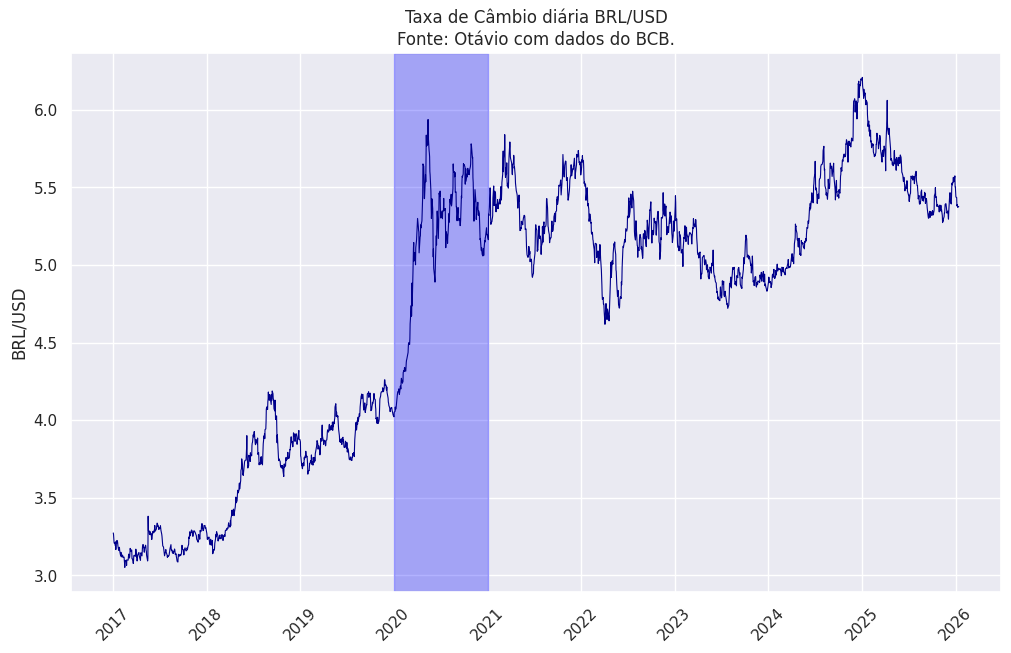

In [7]:
# Plota o gráfico
sns.set()
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data = cambio, x = cambio.index, y = 'cambio', color = 'darkblue', linewidth = 0.8, ax = ax)
ax.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2021-01-01'), alpha = 0.3, color = 'blue')
ax.set(xlabel='', ylabel = 'BRL/USD', title = 'Taxa de Câmbio diária BRL/USD\nFonte: Otávio com dados do BCB.')
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

## 2.2 Visualiza o Retorno logaritmo do câmbio

In [9]:
# Diferencia o log preço do câmbio
dcambio = np.log(cambio['cambio']).diff().dropna()
dcambio_df = pd.DataFrame(dcambio).reset_index()

In [10]:
dcambio_df

,Date,cambio
0,2017-01-03,-0.002968
1,2017-01-04,-0.009205
2,2017-01-05,-0.006329
3,2017-01-06,-0.002243
4,2017-01-09,0.001247
...,...,...
2261,2026-01-07,0.001542
2262,2026-01-08,-0.000371
2263,2026-01-09,-0.002845
2264,2026-01-12,0.000986


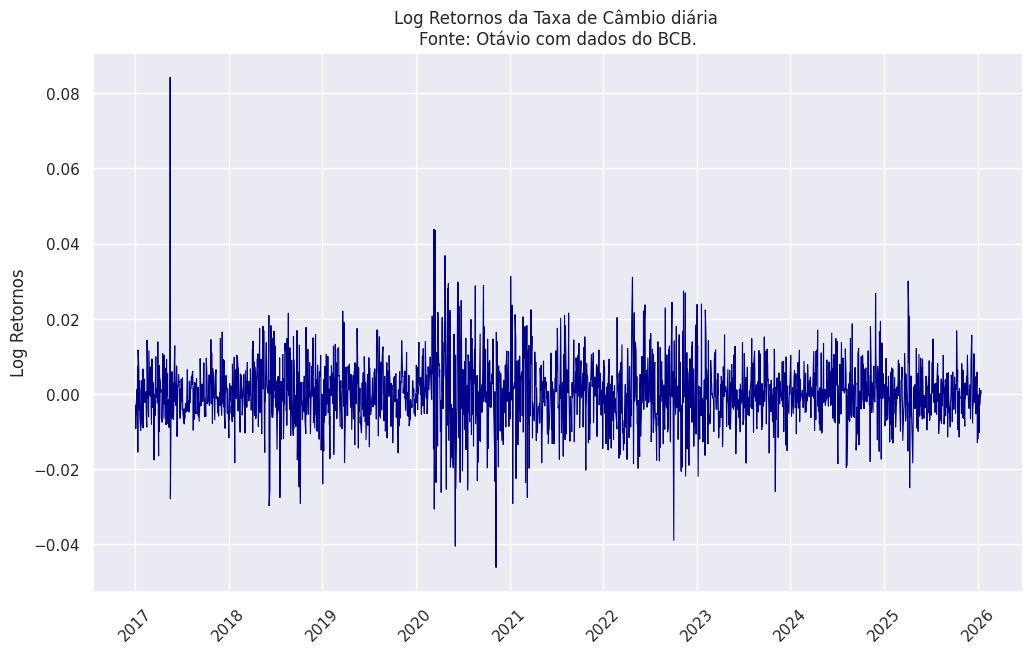

In [11]:
# Plota o gráfico
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data = dcambio_df, x = 'Date', y = 'cambio', color = 'darkblue', linewidth = 0.8, ax = ax)
ax.set(xlabel = '', ylabel = 'Log Retornos', title = 'Log Retornos da Taxa de Câmbio diária \nFonte: Otávio com dados do BCB.')
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

## 2.3 Autocorrelação da série do Retorno logaritmo do câmbio

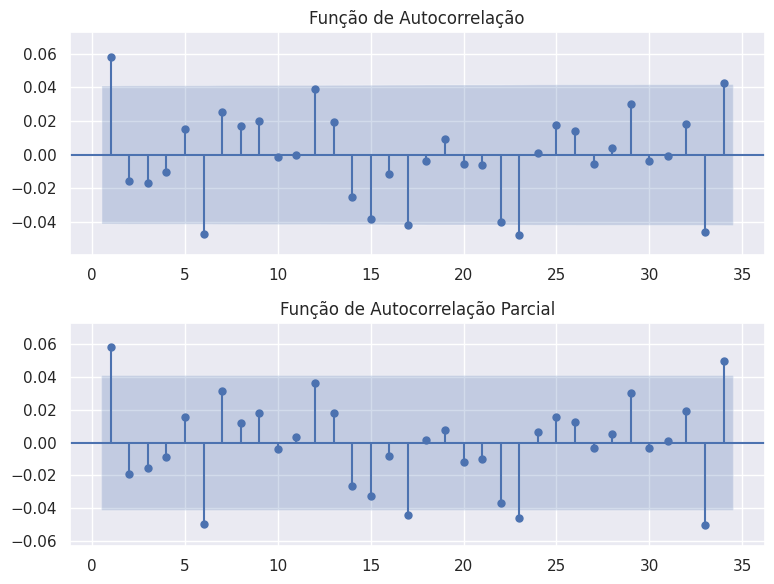

In [12]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

# Plotar o ACF e PACF lado a lado
fig, axes = plt.subplots(2, 1, figsize = (8, 6))

# Plotar o ACF
tsaplots.plot_acf(dcambio, ax = axes[0], zero = False, auto_ylims = True);
axes[0].set_title("Função de Autocorrelação")

# Plotar o PACF
tsaplots.plot_pacf(dcambio, ax = axes[1], zero = False, auto_ylims = True);
axes[1].set_title("Função de Autocorrelação Parcial");

plt.tight_layout()
plt.show()

# 3. Construção do modelo de média

In [13]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 38.4 MB/s eta 0:00:00


In [15]:
import pmdarima as pm

# Estimar modelo
modelo = pm.auto_arima(y = dcambio)

In [16]:
print(modelo.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2266
Model:               SARIMAX(0, 0, 1)   Log Likelihood                7535.584
Date:                Tue, 13 Jan 2026   AIC                         -15067.167
Time:                        23:13:35   BIC                         -15055.716
Sample:                             0   HQIC                        -15062.989
                               - 2266                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0593      0.014      4.298      0.000       0.032       0.086
sigma2      7.569e-05   1.14e-06     66.248      0.000    7.34e-05    7.79e-05
Ljung-Box (L1) (Q):                   0.00   Jarque-

Para os log retornos, temos que $y_t = \mu_t + \epsilon_t $, com $\mu_t = \mu$. Assim, podemos dizer que $\epsilon_t  = y_t - \mu_t$ será o resíduo da equação da média, de modo que podemos utilizar $\epsilon_t ^2$ para verificar se existe heterocedasticidade condicional, o que chamamos de efeito ARCH. O código abaixo implementa.

# 4. Verifica a heterocedasticidade condicional

## Teste de Ljung-box

In [17]:
y = dcambio - modelo.fittedvalues()
sm.stats.diagnostic.acorr_ljungbox(y**2, lags = 6)

,lb_stat,lb_pvalue
1,63.231112,1.838219e-15
2,82.722571,1.088985e-18
3,87.167502,8.888614e-19
4,96.912867,4.465408e-20
5,108.275134,9.482913e-22
6,115.851630,1.210165e-22


## Gráfico ACF

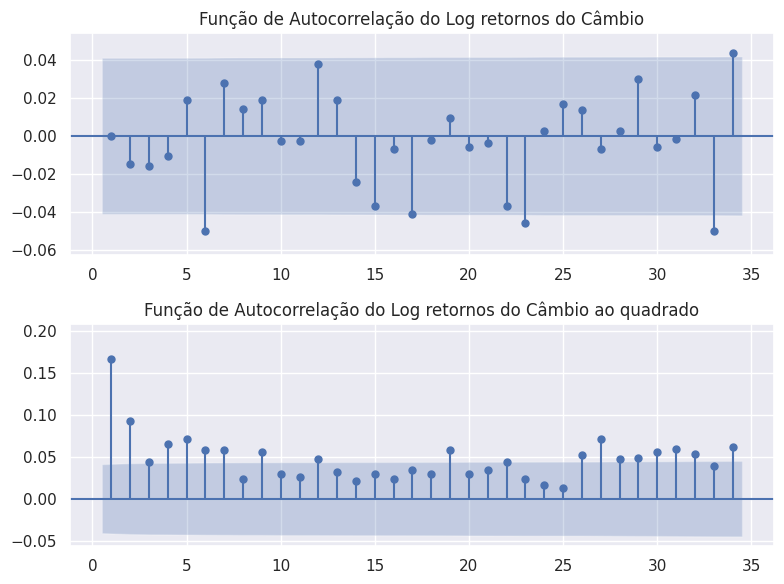

In [18]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# Plotar o ACF e PACF lado a lado
fig, axes = plt.subplots(2, 1, figsize = (8, 6))

# Plotar o ACF
plot_acf(y, ax = axes[0], zero = False, auto_ylims = True);
axes[0].set_title("Função de Autocorrelação do Log retornos do Câmbio")

# Plotar o PACF
plot_acf(y ** 2, ax = axes[1], zero = False, auto_ylims = True);
axes[1].set_title("Função de Autocorrelação do Log retornos do Câmbio ao quadrado");

plt.tight_layout()
plt.show()

# 5. Distribuição dos resíduos

In [19]:
import scipy.stats as stats

# Teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(y.values)

# Verifique o p-valor
alpha = 0.05  # Nível de significância
if p_valor > alpha:
    print("Os dados parecem seguir uma distribuição normal (não podemos rejeitar a hipótese nula)")
else:
    print("Os dados não parecem seguir uma distribuição normal (rejeitamos a hipótese nula)")

Os dados não parecem seguir uma distribuição normal (rejeitamos a hipótese nula)


Text(0, 0.5, 'Frequência')

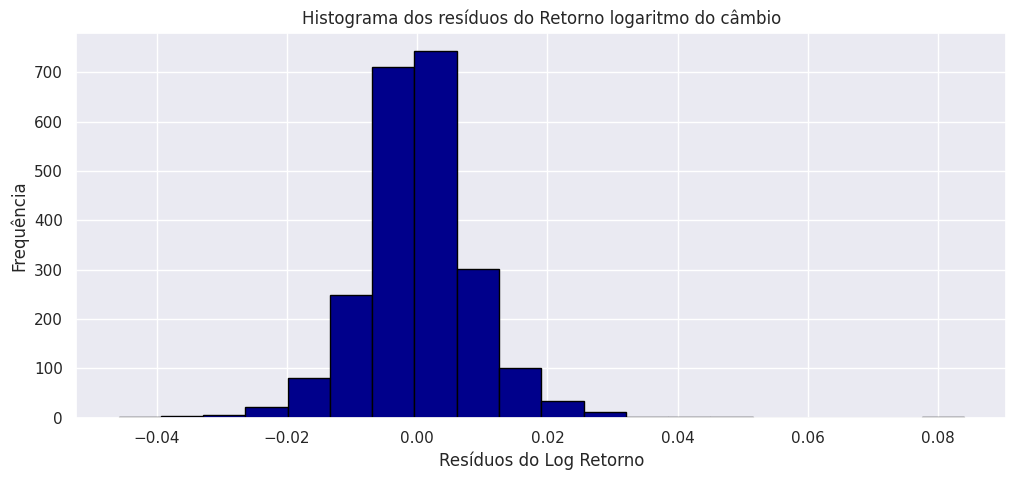

In [20]:
# Cria um histograma do log retorno do câmbio
plt.figure(figsize=(12, 5))
plt.hist(y, bins=20, color='darkblue', edgecolor='black')
plt.title('Histograma dos resíduos do Retorno logaritmo do câmbio')
plt.xlabel('Resíduos do Log Retorno')
plt.ylabel('Frequência')

In [21]:
from scipy.stats import kurtosis, skew

y_df = pd.DataFrame(y, columns = ['erros']).reset_index(drop = True)

# Calcula estatísticas descritivas
desc_stats = y_df.describe()

# Calcula a assimetria e a curtose para cada coluna
skewness = y_df.apply(skew)
kurt = y_df.apply(kurtosis, fisher = False)

# Adiciona as métricas de assimetria e curtose ao DataFrame de estatísticas descritivas
desc_stats.loc['skewness'] = skewness
desc_stats.loc['kurtosis'] = kurt

print(desc_stats)

                erros
count     2266.000000
mean         0.000207
std          0.008699
min         -0.045849
25%         -0.004665
50%          0.000072
75%          0.004646
max          0.083933
skewness     0.426226
kurtosis     8.721956


Um valor de skewness positivo (0.4262) indica que a distribuição dos dados é assimétrica à direita (positivamente inclinada), o que significa que a cauda direita da distribuição é mais longa ou pesada do que a cauda esquerda. Isso sugere que há uma tendência para valores maiores do que a média.

Um valor de kurtosis maior que 3 (7.461759, sem subtrair 3) indica que a distribuição é mais "empinada" (mais concentrada nas caudas) do que a distribuição normal. Isso significa que a distribuição tem caudas mais grossas e pode ter valores extremos mais frequentes do que o esperado em uma distribuição normal.

Como vimos, a hipótese de distribuição normal não foi aceita, bem como sabemos que os dados possuem assimetria positiva e curtose maior que 3, significando que possuí valores extremos com mais frequência.

Sugere-se portanto o uso de uma distribuição que permita capturar esses fatos.



# 6. Construção da Volatilidade do Câmbio

In [22]:
# Específica o GARCH(1,1)
cambio_gm = arch_model(dcambio * 100, p = 1, q = 1,
                      mean = 'AR', lags = 1,
                       vol = 'GARCH',
                       dist = 'skewt')

cambio_result = cambio_gm.fit(disp = 'off')

In [23]:
# Resultados do modelo
print(cambio_result.summary())

                                 AR - GARCH Model Results                                
Dep. Variable:                            cambio   R-squared:                       0.003
Mean Model:                                   AR   Adj. R-squared:                  0.002
Vol Model:                                 GARCH   Log-Likelihood:               -2688.02
Distribution:      Standardized Skew Student's t   AIC:                           5390.05
Method:                       Maximum Likelihood   BIC:                           5430.12
                                                   No. Observations:                 2265
Date:                           Tue, Jan 13 2026   Df Residuals:                     2263
Time:                                   23:14:44   Df Model:                            2
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
----------------------------------

Text(0.5, 1.0, 'Volatilidade Anualizada do Câmbio - GARCH(1,1) \n Fonte: Otávio')

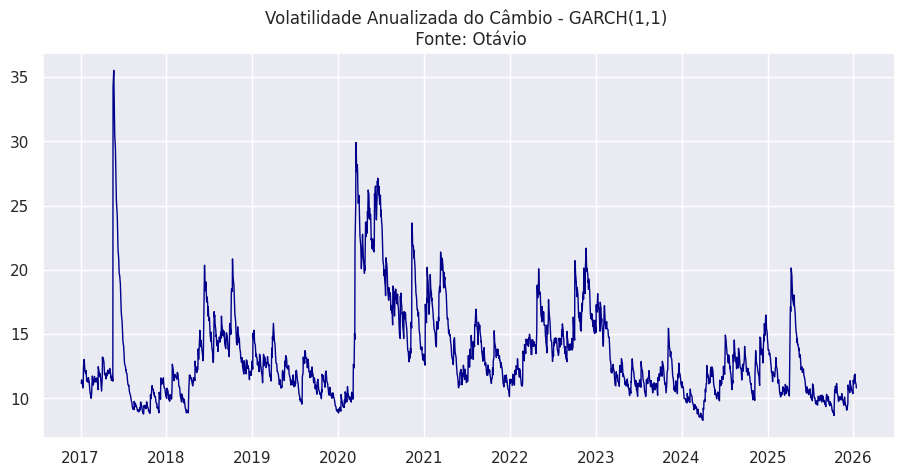

In [24]:
plt.figure(figsize=(11, 5))
plt.plot(cambio_result.conditional_volatility  * np.sqrt(252), color = 'darkblue', linewidth = 1)
plt.title('Volatilidade Anualizada do Câmbio - GARCH(1,1) \n Fonte: Otávio')

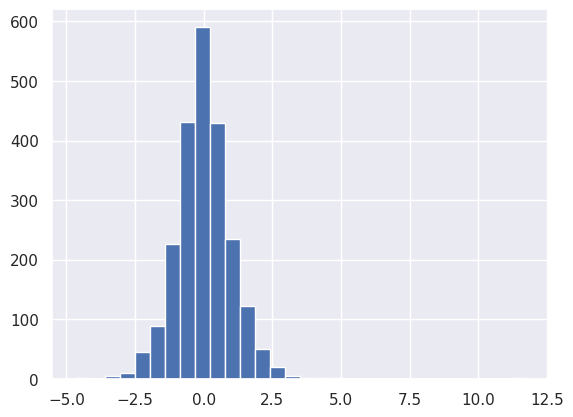

In [25]:
gm_std_resid = cambio_result.resid / cambio_result.conditional_volatility

plt.hist(gm_std_resid, bins = 30);

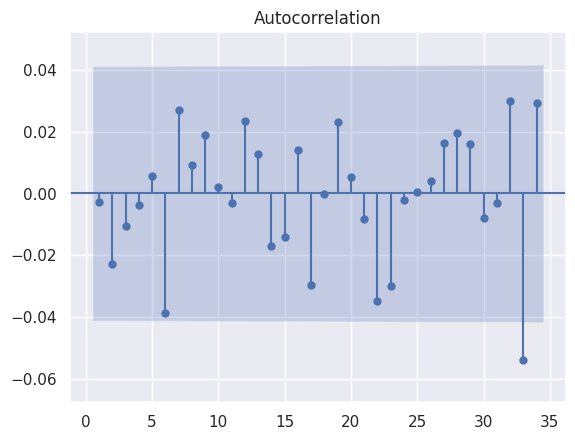

In [26]:
plot_acf(gm_std_resid.dropna(), zero = False, auto_ylims = True);